# Get Started

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/unclean_dataset.zip

--2022-04-15 07:44:52--  http://mnt.bsthun.com:6511/Fai_folder/Dataset/unclean_dataset.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6900281582 (6.4G) [application/zip]
Saving to: ‘unclean_dataset.zip’

unclean_dataset.zip 100%[===================>]   6.43G  15.6MB/s    in 7m 7s   

2022-04-15 07:51:59 (15.4 MB/s) - ‘unclean_dataset.zip’ saved [6900281582/6900281582]



In [ ]:
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/unclean_dataset.zip
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV1_noclach.zip
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV1_clach.zip
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV2_upnoclach.zip

--2022-04-10 01:04:48--  http://mnt.bsthun.com:6511/Fai_folder/Dataset/unclean_dataset.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6900281582 (6.4G) [application/zip]
Saving to: ‘unclean_dataset.zip’

unclean_dataset.zip 100%[===================>]   6.43G  58.9MB/s    in 1m 56s  

2022-04-10 01:06:43 (57.0 MB/s) - ‘unclean_dataset.zip’ saved [6900281582/6900281582]

--2022-04-10 01:06:44--  http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV1_noclach.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3174329928 (3.0G) [application/zip]
Saving to: ‘CleanV1_noclach.zip’

CleanV1_noclach.zip 100%[===================>]   2.96G  59.3MB/s    in 52s     

2022-04-10 01:07:36 (58.5 MB/s) - ‘CleanV

In [ ]:
!wget http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV2_upnoclach.zip

--2022-04-11 09:47:39--  http://mnt.bsthun.com:6511/Fai_folder/Dataset/CleanV2_upnoclach.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2505510391 (2.3G) [application/zip]
Saving to: ‘CleanV2_upnoclach.zip’

CleanV2_upnoclach.z 100%[===================>]   2.33G  15.7MB/s    in 2m 34s  

2022-04-11 09:50:13 (15.5 MB/s) - ‘CleanV2_upnoclach.zip’ saved [2505510391/2505510391]



> - unzipping a folder a time each is recommended to prevend ambiguity.

In [ ]:
!unzip -q /content/unclean_dataset.zip
!unzip -q /content/CleanV1_noclach.zip
#!unzip -q /content/CleanV1_clach.zip
!unzip -q /content/CleanV2_upnoclach.zip

replace unclean_dataset/dataset/Negative/195_png/20220211_195 (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A

A
replace content/clean_dataset/Positive/034A_png/20220131_034A (79).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace content/LeptoV3/Test/Positive/20220106_039A (30).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [2]:
!unzip -q /content/unclean_dataset.zip

In [ ]:
!unzip -q /content/CleanV2_upnoclach.zip

In [7]:
shutil.rmtree("/content/unclean_dataset/dataset")

# Util

In [4]:
!pip -q install paramiko

     |████████████████████████████████| 211 kB 7.2 MB/s 
     |████████████████████████████████| 856 kB 67.9 MB/s 
     |████████████████████████████████| 61 kB 557 kB/s 
     |████████████████████████████████| 3.6 MB 50.9 MB/s 


In [5]:
import paramiko

def upload(filepath, destination_path = "/var/www/html/Pice_folder"): #destination_path: default is ""/var/www/html/Pice_folder"
    filename = filepath.split("/")[-1]
    transport = paramiko.Transport(("server2.bsthun.com", 6500))
    transport.connect(username = "root", password = "trp0843840477")
    sftp = paramiko.SFTPClient.from_transport(transport)
    sftp.put(filepath, (destination_path + "/" + filename))
    sftp.close()
    transport.close()
#upload("data1.csv")

# Import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import glob
from PIL import Image
import cv2
import random
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier

# Data

In [8]:
data = {"unclean_dataset":{"positive":"/content/unclean_dataset/Positive","negative":"/content/unclean_dataset/Negative"},
        "CleanV1_no_clahe":{"positive":"/content/CleanV1_no_clahe/Positive","negative":"/content/CleanV1_no_clahe/Negative"},
        "CleanV1_clahe":{"positive":"/content/CleanV1_clahe/Positive","negative":"/content/CleanV1_clahe/Negative"}}

In [9]:
def path_train_test_split(path_dict):
  positive = glob.glob('{}/**/*'.format(path_dict["positive"]))
  negative = glob.glob('{}/**/*'.format(path_dict["negative"]))
  train_val_pos, test_pos = train_test_split(positive, test_size=0.30, random_state=99)
  train_val_neg, test_neg = train_test_split(negative, test_size=0.30, random_state=99)
  return train_val_pos, test_pos, train_val_neg, test_neg

In [ ]:
train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["unclean_dataset"])
len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg)

(4030, 1728, 3840, 1646)

# handle folder

In [10]:
!mkdir /content/train_val
!mkdir /content/train_val/Positive
!mkdir /content/train_val/Negative
!mkdir /content/test #please create sub_folder in test cause Keras generator alway looks for subfolders (representing the classes).
!mkdir /content/test/test_folder

In [11]:
def train_test_dir():
  train_val_pos_path = "/content/train_val/Positive"
  train_val_neg_path = "/content/train_val/Negative"
  test_path = "/content/test/test_folder"

  for i in tqdm(train_val_pos):
    src = i
    dst = train_val_pos_path
    shutil.copy(src, dst)

  for i in tqdm(test_pos):
    src = i
    dst = test_path
    shutil.copy(src, dst)

  for i in tqdm(train_val_neg):
    src = i
    dst = train_val_neg_path
    shutil.copy(src, dst)

  for i in tqdm(test_neg):
    src = i
    dst = test_path
    shutil.copy(src, dst)

def get_test_df(test_pos, test_neg):
  test_df_pos = pd.DataFrame(test_pos, columns=['path'])
  test_df_pos['filename'] = test_df_pos['path'].apply(lambda x:x.split("/")[-1])
  test_df_pos['labels'] = 1

  test_df_neg = pd.DataFrame(test_neg, columns=['path'])
  test_df_neg['filename'] = test_df_neg['path'].apply(lambda x:x.split("/")[-1])
  test_df_neg['labels'] = 0

  test_df = pd.concat([test_df_pos,test_df_neg], axis=0)
  test_df.reset_index(drop=True, inplace=True)
  return test_df

In [19]:
def train_valid_test_generator(train_val_dir, test_dir, validation_split = 0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input):
  # train_val_dir = "/content/train_val" # for original format
  # test_dir = "/content/test"

  # train_val_dir = "/content/CleanV2_up_no_clahe/Train_Val" # for format that fai is organized
  # test_dir = "/content/CleanV2_up_no_clahe/Test"

  train_datagen = ImageDataGenerator(validation_split=validation_split,
                                    preprocessing_function=preprocessing_function)
  test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

  train_generator = train_datagen.flow_from_directory(
      directory=train_val_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=128,
      class_mode="binary",
      subset = 'training',
      shuffle=True,
      seed=999
  )

  valid_generator = train_datagen.flow_from_directory(
      directory=train_val_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=128,
      class_mode="binary",
      subset = 'validation',
      shuffle=False,
      seed=999
  )

  test_generator = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=1,
      class_mode=None,
      shuffle=False,
      seed=999
  )

  return train_generator, valid_generator, test_generator

In [ ]:
train_test_dir()
test_df = get_test_df(test_pos, test_neg)

100%|██████████| 1646/1646 [00:03<00:00, 472.79it/s]


In [ ]:
train_val_dir = "/content/train_val"
test_dir = "/content/test"
train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
                                                                              test_dir,
                                                                              validation_split = 0.2, 
                                                                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

Found 6264 images belonging to 2 classes.
Found 1565 images belonging to 2 classes.
Found 3362 images belonging to 1 classes.


# Model

In [ ]:
result_path_all = {"unclean":"/content/result_unclean",
                   "v1_no_clahe":"/content/result_v1_no_clahe",
                   "v1_clahe":"/content/result_v1_clahe",
                   "v2_no_clahe":"/content/result_v2_no_clahe",
                   "v2_clahe":"/content/result_v2_clahe",
                   "v2_up_no_clahe":"/content/result_v2_up_no_clahe",
                   "v2_up_clahe":"/content/result_v2_up_clahe"}

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

def build_model(path_to_save):

  base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
                    include_top = False, # Leave out the last fully connected layer
                    weights = 'imagenet')
  
  for layer in base_model.layers[:4]:
    layer.trainable = False

  x = layers.Flatten()(base_model.output)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.models.Model(base_model.input, x)

  model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-5), 
              loss = 'binary_crossentropy',metrics = ['acc'])

  checkpoint = ModelCheckpoint(filepath=path_to_save,
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
  earlyStopping = tf.keras.callbacks.EarlyStopping(
                              monitor="val_loss",
                              patience=5,
                              verbose=1,
                              mode="min",
                            )
  callbacks = [checkpoint, earlyStopping]

  return model, callbacks

def fit_model(model, epochs, callbacks):
  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

  history = model.fit_generator(generator=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=epochs, callbacks=callbacks)
  return history

def save_history_plot(history, path_to_save):
  pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
  plt.title("Loss - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "loss.png"
  plt.savefig(path_pic)

  pd.DataFrame(history.history)[['acc', 'val_acc']].plot()
  plt.title("Accuracy - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "accuracy.png"
  plt.savefig(path_pic)

In [ ]:
!mkdir /content/result_unclean # name depends on dataset
result_path = "/content/result_unclean"

In [ ]:
model, callbacks = build_model(path_to_save="/content/result_unclean", 
                                dir_name="VGG16_unclean")
history = fit_model(model, epochs=10, callbacks=callbacks)

58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
48/48 [==============================] - ETA: 0s - loss: 0.7111 - acc: 0.7777
Epoch 1: val_loss improved from inf to 0.65268, saving model to /content/result_unclean/VGG16_unclean
INFO:tensorflow:Assets written to: /content/result_unclean/VGG16_unclean/assets
48/48 [==============================] - 166s 3s/step - loss: 0.7111 - acc: 0.7777 - val_loss: 0.6527 - val_acc: 0.7858
Epoch 2/20
48/48 [==============================] - ETA: 0s - loss: 0.0857 - acc: 0.9672
Epoch 2: val_loss improved from 0.65268 to 0.40175, saving model to /content/result_unclean/VGG16_unclean
INFO:tensorflow:Assets written to: /content/result_unclean/VGG16_unclean/assets
48/48 [==============================] - 121s 3s/step - loss: 0.0857 - acc: 0.9672 - val_loss: 0.4017 - val_acc: 0.8379
Epoch 3/20
48/48 [==============================] - ETA: 0s - loss: 0.0118 - acc: 0.9958
Epoch 3: val_loss improved from 0.40175 to 0.35094, saving model to /content/result_unclean/VGG16_unclean
INFO:tensorflow:Ass

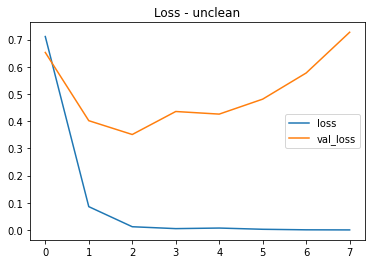

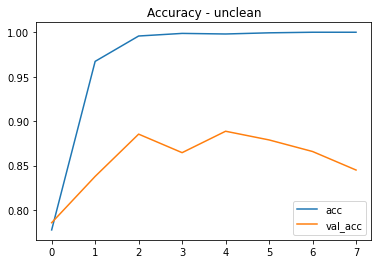

In [ ]:
save_history_plot(history, path_to_save="/content/result_unclean")

# Prediction

In [ ]:
def get_loaded_model(path_saved_model):
  loaded_model = tf.keras.models.load_model(path_saved_model)
  return loaded_model

def predict_valid(loaded_model):
  STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size + 1
  valid_generator.reset()
  preds = loaded_model.predict_generator(valid_generator, steps=STEP_SIZE_TEST, verbose=1)

  return preds

def predict_test(loaded_model):
  STEP_SIZE_TEST=test_generator.n//test_generator.batch_size + 1
  test_generator.reset()
  preds = loaded_model.predict_generator(test_generator,
                                steps=STEP_SIZE_TEST,
                                verbose=1)
  return preds

def get_threshold_result_valid(preds, threshold):
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)
  
  pred_labels = [i[0] for i in preds_result]
  true_labels = valid_generator.labels

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(valid_generator.labels)) * 100
  print("Accuracy on validation set is: {}".format(persent))

  return pred_labels, true_labels

def get_threshold_result_test(preds, threshold):
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)

  pred_df = pd.DataFrame(test_generator.filenames, columns=['path'])
  pred_df['filename'] = pred_df['path'].apply(lambda x:x.split("/")[-1])
  pred_df['labels'] = preds_result

  df = test_df.merge(pred_df, on='filename')
  
  pred_labels = df['labels_y'].values
  true_labels = df['labels_x'].values

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(test_generator.labels)) * 100
  print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels, df

def get_threshold_result_test_ver2(preds, threshold): # for fai organized
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)
  
  pred_labels = [i[0] for i in preds_result]
  true_labels = test_generator.labels

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(test_generator.labels)) * 100
  print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels

def get_confusion_matrix(pred_labels, true_labels, model_name, data_version_name, data_split_name, path_to_save, save=False):
  fig, axes = plt.subplots(1, 1, figsize=(8, 8))
  disp = ConfusionMatrixDisplay(confusion_matrix(true_labels,
                                      pred_labels),
                                      display_labels=[0, 1])
  disp.plot(ax=axes, values_format='.4g', cmap="Blues")
  fig.suptitle("Confusion Matrix - {} - {} - {}".format(model_name,data_version_name,data_split_name), size=20, y=0.94) # "Confusion Matrix - VGG16 - Augmented - Test set"
  filename = "Confusion-Matrix-{}-{}-{}.png".format(model_name,data_version_name,data_split_name)
  if save == True:
    plt.savefig("{}/{}".format(path_to_save, filename)) # Confusion-Matrix-VGG16-Augmented-test-pos-neg-50-50.png

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


13/13 [==============================] - 38s 3s/step
Accuracy on validation set is: 88.75399361022365


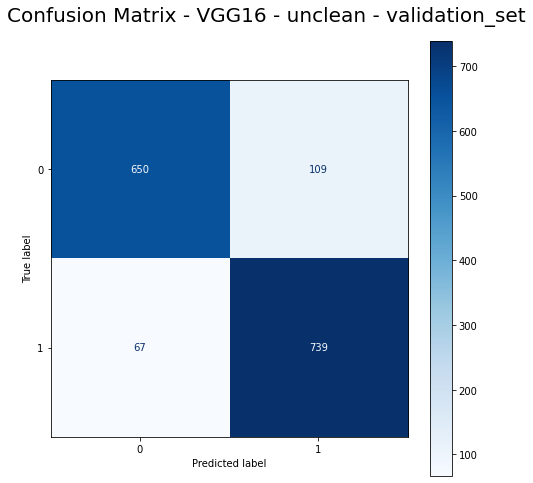

In [ ]:
loaded_model = get_loaded_model(path_saved_model="/content/result_unclean/VGG16_unclean")
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="VGG16", 
                     data_version_name= result_path_all['unclean'].split("result_")[-1], 
                     data_split_name="validation_set", 
                     path_to_save= result_path_all['unclean'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3363/3363 [==============================] - 55s 16ms/step
Accuracy on test set is: 98.36406900654372


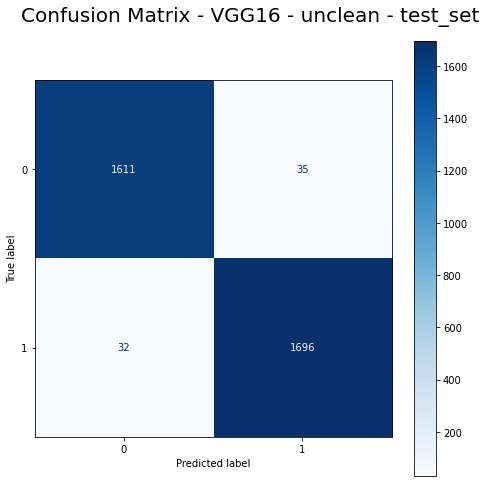

In [ ]:
loaded_model = get_loaded_model(path_saved_model="/content/result_unclean/VGG16_unclean")
preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test = get_threshold_result_test(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="VGG16", 
                     data_version_name= result_path_all['unclean'].split("result_")[-1], 
                     data_split_name="test_set", 
                     path_to_save= result_path_all['unclean'])

# All process

In [ ]:
!wget http://mnt.bsthun.com:6511/Pice_folder/Leptospiral/Vgg16/Original/VGG16_unclean_model.zip

--2022-04-10 16:14:16--  http://mnt.bsthun.com:6511/Pice_folder/Leptospiral/Vgg16/Original/VGG16_unclean_model.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248602977 (237M) [application/zip]
Saving to: ‘VGG16_unclean_model.zip’

VGG16_unclean_model 100%[===================>] 237.09M  14.6MB/s    in 18s     

2022-04-10 16:14:34 (13.3 MB/s) - ‘VGG16_unclean_model.zip’ saved [248602977/248602977]



In [12]:
data = {"unclean_dataset":{"positive":"/content/unclean_dataset/Positive","negative":"/content/unclean_dataset/Negative"},
        "CleanV1_no_clahe":{"positive":"/content/CleanV1_no_clahe/Positive","negative":"/content/CleanV1_no_clahe/Negative"},
        "CleanV1_clahe":{"positive":"/content/CleanV1_clahe/Positive","negative":"/content/CleanV1_clahe/Negative"}}

result_path_all = {"unclean":"/content/result_unclean",
                   "v1_no_clahe":"/content/result_v1_no_clahe",
                   "v1_clahe":"/content/result_v1_clahe",
                   "v2_no_clahe":"/content/result_v2_no_clahe",
                   "v2_clahe":"/content/result_v2_clahe",
                   "v2_up_no_clahe":"/content/result_v2_up_no_clahe",
                   "v2_up_clahe":"/content/result_v2_up_clahe"}

In [13]:
!mkdir /content/train_val
!mkdir /content/train_val/Positive
!mkdir /content/train_val/Negative
!mkdir /content/test #please create sub_folder in test cause Keras generator alway looks for subfolders (representing the classes).
!mkdir /content/test/test_folder

mkdir: cannot create directory ‘/content/train_val’: File exists
mkdir: cannot create directory ‘/content/train_val/Positive’: File exists
mkdir: cannot create directory ‘/content/train_val/Negative’: File exists
mkdir: cannot create directory ‘/content/test’: File exists
mkdir: cannot create directory ‘/content/test/test_folder’: File exists


In [ ]:
!mkdir /content/result_v1_clahe # name depends on dataset
result_path = result_path_all["v1_clahe"] # change
model_path = result_path + "/" + "VGG16_v1_clahe" # change

In [ ]:
result_path, model_path

('/content/result_v1_clahe', '/content/result_v1_clahe/VGG16_v1_clahe')

In [ ]:
!unzip /content/VGG16_unclean_model.zip

Archive:  /content/VGG16_unclean_model.zip
   creating: content/result_unclean/VGG16_unclean/
   creating: content/result_unclean/VGG16_unclean/variables/
  inflating: content/result_unclean/VGG16_unclean/variables/variables.data-00000-of-00001  
  inflating: content/result_unclean/VGG16_unclean/variables/variables.index  
   creating: content/result_unclean/VGG16_unclean/assets/
  inflating: content/result_unclean/VGG16_unclean/keras_metadata.pb  
  inflating: content/result_unclean/VGG16_unclean/saved_model.pb  


### Original

In [ ]:
result_path = result_path_all["unclean"] # change
model_path = result_path + "/" + "VGG16_unclean" # change
result_path, model_path

('/content/result_unclean', '/content/result_unclean/VGG16_unclean')

In [ ]:
model_path = "/content/content/result_unclean/VGG16_unclean"

In [ ]:
def get_threshold_result_test(preds, threshold):
  # preds_result = (preds > threshold) 
  # preds_result = preds_result.astype(int)

  pred_df = pd.DataFrame(test_generator.filenames, columns=['path'])
  pred_df['filename'] = pred_df['path'].apply(lambda x:x.split("/")[-1])
  pred_df['labels'] = preds

  df = test_df.merge(pred_df, on='filename')
  
  pred_labels = df['labels_y'].values
  true_labels = df['labels_x'].values

  # num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  # persent = (num_correct / len(test_generator.labels)) * 100
  # print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels, df

In [ ]:
# train valid test
# train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["unclean_dataset"]) # change
# print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

# #handle folder
# train_test_dir()
# test_df = get_test_df(test_pos, test_neg)
# train_val_dir = "/content/train_val" # change
# test_dir = "/content/test" # change
# train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
#                                                                               test_dir,
#                                                                               validation_split = 0.2, 
#                                                                               preprocessing_function = tf.keras.applications.vgg16.preprocess_input) # change
# # Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
# preds_valid = predict_valid(loaded_model)
# pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
# get_confusion_matrix(pred_labels_valid, true_labels_valid, 
#                      model_name="VGG16", # change
#                      data_version_name= result_path.split("result_")[-1], # change
#                      data_split_name="validation_set", 
#                      path_to_save= result_path,
#                      save=False) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test, df = get_threshold_result_test(preds_test, threshold=0.5)
# get_confusion_matrix(pred_labels_test, true_labels_test, 
#                      model_name="VGG16", # change
#                      data_version_name= result_path.split("result_")[-1], # change
#                      data_split_name="test_set", 
#                      path_to_save= result_path,
#                      save=False) # change

In [ ]:
df

,path_x,filename,labels_x,path_y,labels_y
0,/content/unclean_dataset/Positive/071A_png/202...,20220106_071A (48).png,1,test_folder/20220106_071A (48).png,9.999999e-01
1,/content/unclean_dataset/Positive/Single A81_p...,20220131_Single A81 (44).png,1,test_folder/20220131_Single A81 (44).png,1.000000e+00
2,/content/unclean_dataset/Positive/017A_png/202...,20220118_017A (4).png,1,test_folder/20220118_017A (4).png,9.228987e-01
3,/content/unclean_dataset/Positive/002A_png/202...,20220118_002A (13).png,1,test_folder/20220118_002A (13).png,9.998831e-01
4,/content/unclean_dataset/Positive/Single A74_p...,20220131_Single A74 (28).png,1,test_folder/20220131_Single A74 (28).png,9.999981e-01
...,...,...,...,...,...
3369,/content/unclean_dataset/Negative/SC34_png/202...,20220118_SC34 (38).png,0,test_folder/20220118_SC34 (38).png,2.259218e-04
3370,/content/unclean_dataset/Negative/M10_png/2022...,20220131_M10 (68).png,0,test_folder/20220131_M10 (68).png,1.186133e-06
3371,/content/unclean_dataset/Negative/NMF9_png/202...,20220118_NMF9 (29).png,0,test_folder/20220118_NMF9 (29).png,5.619739e-02
3372,/content/unclean_dataset/Negative/NMF17_png/20...,20220118_NMF17 (30).png,0,test_folder/20220118_NMF17 (30).png,9.850410e-07


In [ ]:
pred_test = df['labels_y']
true_label = df['labels_x']

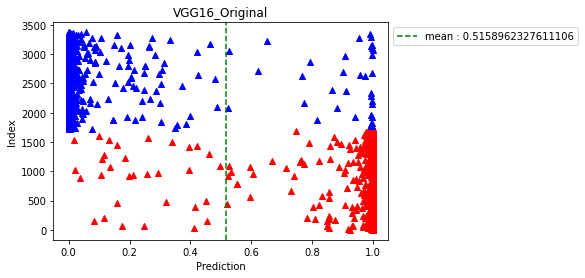

In [ ]:
import matplotlib.pyplot as plt

pred_test = df['labels_y']
true_label = df['labels_x']

for i in range (0,len(pred_test)):
  if true_label[i] == 1:
    plt.scatter(pred_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(pred_test[i],i, c='blue', marker = '^')

# plt.scatter(pred_test[0],0)
# plt.scatter(pred_test[1],1)

# # list(range(1,len(pred_test)+1)
plt.axvline(x=sum(pred_test)/len(pred_test), color='g',ls='--', label = 'mean : '+str(sum(pred_test)/len(pred_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('VGG16_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

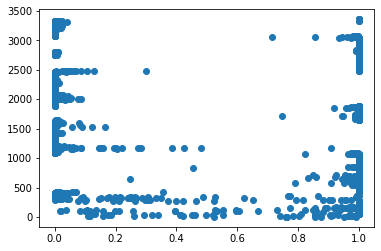

In [ ]:
import random
values = pd.DataFrame(preds_test)[0].values
plt.scatter(x=values, y=[i for i in range(0, len(values))])

In [ ]:
preds_test

### V1_no_clahe

4725 2026 2300 986
Found 5620 images belonging to 2 classes.
Found 1405 images belonging to 2 classes.
Found 3012 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
43/43 [==============================] - ETA: 0s - loss: 0.8625 - acc: 0.6795
Epoch 1: val_loss improved from inf to 0.74610, saving model to /content/result_v1_no_clahe/VGG16_v1_no_clahe
INFO:tensorflow:Assets written to: /content/result_v1_no_clahe/VGG16_v1_no_clahe/assets
43/43 [==============================] - 117s 3s/step - loss: 0.8625 - acc: 0.6795 - val_loss: 0.7461 - val_acc: 0.6406
Epoch 2/10
43/43 [==============================] - ETA: 0s - loss: 0.2730 - acc: 0.8776
Epoch 2: val_loss improved from 0.74610 to 0.53857, saving model to /content/result_v1_no_clahe/VGG16_v1_no_clahe
INFO:tensorflow:Assets written to: /content/result_v1_no_clahe/VGG16_v1_no_clahe/assets
43/43 [==============================] - 97s 2s/step - loss: 0.2730 - acc: 0.8776 - val_loss: 0.5386 - val_acc: 0.7594
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 0.0603 - acc: 0.9802
Epoch 3: val_loss did not improve from 0.53857
43/43 [==============================] - 92s 2s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


11/11 [==============================] - 40s 4s/step
Accuracy on validation set is: 77.08185053380782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3013/3013 [==============================] - 52s 17ms/step
Accuracy on test set is: 87.78220451527224


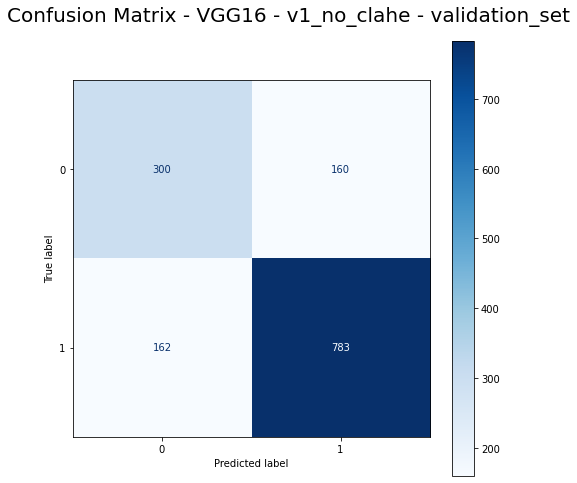

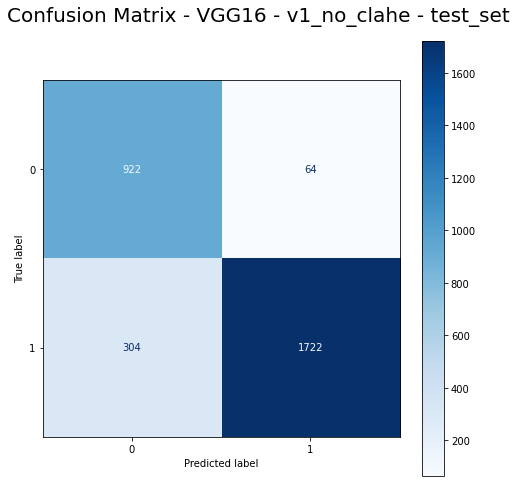

In [ ]:
# train valid test
train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["CleanV1_no_clahe"]) # change
print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

#handle folder
train_test_dir()
test_df = get_test_df(test_pos, test_neg)
train_val_dir = "/content/train_val" # change
test_dir = "/content/test" # change
train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
                                                                              test_dir,
                                                                              validation_split = 0.2, 
                                                                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input) # change

# Model
model, callbacks = build_model(path_to_save=model_path) # change
history = fit_model(model, epochs=10, callbacks=callbacks)

# Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="validation_set", 
                     path_to_save= result_path) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test = get_threshold_result_test(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="test_set", 
                     path_to_save= result_path) # change

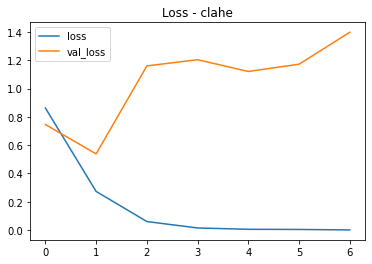

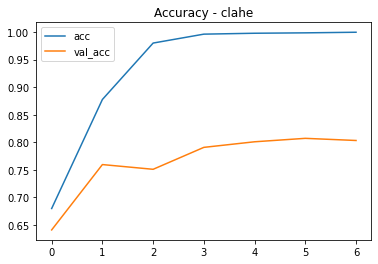

In [ ]:
save_history_plot(history, path_to_save=result_path)

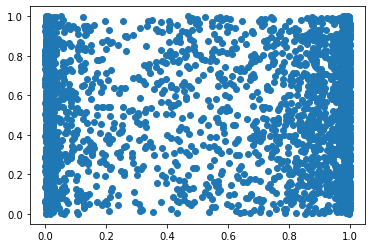

In [ ]:
import random
values = pd.DataFrame(preds_test)[0].values
plt.scatter(x=values, y=[random.random() for i in range(0, len(values))])

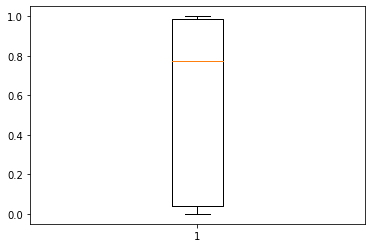

In [ ]:
plt.boxplot(pd.DataFrame(preds_test)[0].values)
plt.show()

In [ ]:
shutil.rmtree("/content/train_val")
shutil.rmtree("/content/test")

### V1_clahe

In [ ]:
!mkdir /content/result_v1_clahe # name depends on dataset
result_path = result_path_all["v1_clahe"] # change
model_path = result_path + "/" + "VGG16_v1_clahe" # change
result_path, model_path

('/content/result_v1_clahe', '/content/result_v1_clahe/VGG16_v1_clahe')

4725 2026 2300 986
Found 5620 images belonging to 2 classes.
Found 1405 images belonging to 2 classes.
Found 3012 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
43/43 [==============================] - ETA: 0s - loss: 0.6650 - acc: 0.6593
Epoch 1: val_loss improved from inf to 0.64676, saving model to /content/result_v1_clahe/VGG16_v1_clahe
INFO:tensorflow:Assets written to: /content/result_v1_clahe/VGG16_v1_clahe/assets
43/43 [==============================] - 58s 1s/step - loss: 0.6650 - acc: 0.6593 - val_loss: 0.6468 - val_acc: 0.6406
Epoch 2/10
43/43 [==============================] - ETA: 0s - loss: 0.4126 - acc: 0.7993
Epoch 2: val_loss improved from 0.64676 to 0.48105, saving model to /content/result_v1_clahe/VGG16_v1_clahe
INFO:tensorflow:Assets written to: /content/result_v1_clahe/VGG16_v1_clahe/assets
43/43 [==============================] - 48s 1s/step - loss: 0.4126 - acc: 0.7993 - val_loss: 0.4810 - val_acc: 0.8180
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 0.0831 - acc: 0.9705
Epoch 3: val_loss did not improve from 0.48105
43/43 [==============================] - 51s 1s/step - loss: 0.0831 - ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


11/11 [==============================] - 13s 1s/step
Accuracy on validation set is: 83.27402135231317


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3013/3013 [==============================] - 28s 9ms/step
Accuracy on test set is: 94.02390438247012


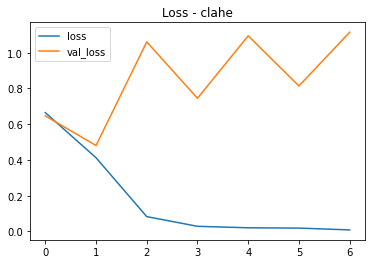

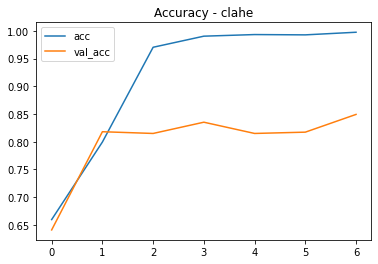

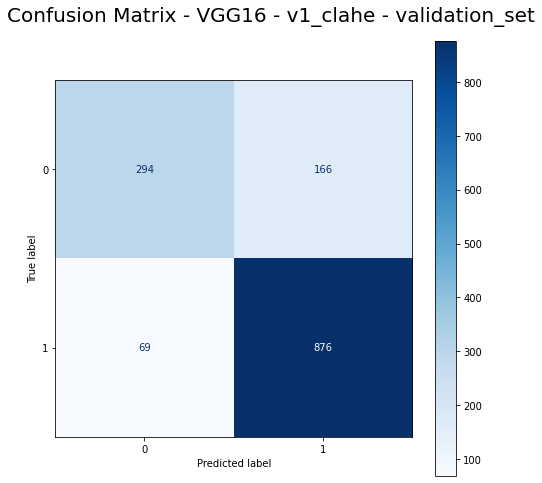

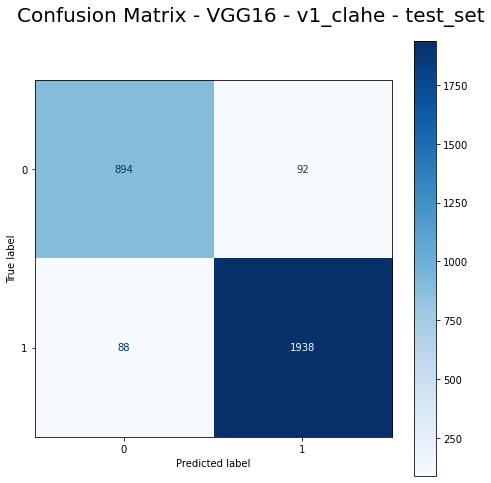

In [ ]:
# train valid test
train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["CleanV1_clahe"]) # change
print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

#handle folder
#train_test_dir()
test_df = get_test_df(test_pos, test_neg)
train_val_dir = "/content/train_val" # change
test_dir = "/content/test" # change
train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
                                                                              test_dir,
                                                                              validation_split = 0.2, 
                                                                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input) # change

# Model
model, callbacks = build_model(path_to_save=model_path) # change
history = fit_model(model, epochs=10, callbacks=callbacks)
save_history_plot(history, path_to_save=result_path)

# Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="validation_set", 
                     path_to_save= result_path) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test = get_threshold_result_test(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="test_set", 
                     path_to_save= result_path) # change

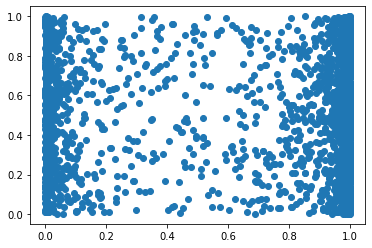

In [ ]:
import random
values = pd.DataFrame(preds_test)[0].values
plt.scatter(x=values, y=[i for i in range(0, len(values))])

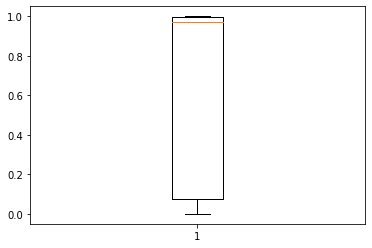

In [ ]:
plt.boxplot(pd.DataFrame(preds_test)[0].values)
plt.show()

In [ ]:
shutil.rmtree("/content/train_val")
shutil.rmtree("/content/test")

### V2_Up_no_clahe

In [ ]:
!mkdir /content/result_v2_up_no_clahe # name depends on dataset
result_path = result_path_all["v2_up_no_clahe"] # change
model_path = result_path + "/" + "VGG16_v2_up_no_clahe" # change
result_path, model_path

('/content/result_v2_up_no_clahe',
 '/content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe')

In [ ]:
def train_valid_test_generator(train_val_dir, test_dir, validation_split = 0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input):
  # train_val_dir = "/content/train_val" # for original format
  # test_dir = "/content/test"

  # train_val_dir = "/content/CleanV2_up_no_clahe/Train_Val" # for format that fai is organized
  # test_dir = "/content/CleanV2_up_no_clahe/Test"

  train_datagen = ImageDataGenerator(validation_split=validation_split,
                                    preprocessing_function=preprocessing_function)
  test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

  train_generator = train_datagen.flow_from_directory(
      directory=train_val_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=128,
      class_mode="binary",
      subset = 'training',
      shuffle=True,
      seed=999
  )

  valid_generator = train_datagen.flow_from_directory(
      directory=train_val_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=128,
      class_mode="binary",
      subset = 'validation',
      shuffle=False,
      seed=999
  )

  test_generator = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=128,
      class_mode="binary",
      shuffle=False,
      seed=999
  )

  return train_generator, valid_generator, test_generator

Found 19282 images belonging to 2 classes.
Found 4820 images belonging to 2 classes.
Found 2157 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
150/150 [==============================] - ETA: 0s - loss: 0.2456 - acc: 0.9247
Epoch 1: val_loss improved from inf to 1.12563, saving model to /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe
INFO:tensorflow:Assets written to: /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe/assets
150/150 [==============================] - 239s 2s/step - loss: 0.2456 - acc: 0.9247 - val_loss: 1.1256 - val_acc: 0.8317
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.0025 - acc: 0.9992
Epoch 2: val_loss improved from 1.12563 to 0.29176, saving model to /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe
INFO:tensorflow:Assets written to: /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe/assets
150/150 [==============================] - 220s 1s/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.2918 - val_acc: 0.9077
Epoch 3/10
150/150 [==============================] - ETA: 0s - loss: 9.4768e-05 - acc: 1.0000
Epoch 3: val_loss did not improve from 0.29176
150/150 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


38/38 [==============================] - 55s 1s/step
Accuracy on validation set is: 92.5311203319502


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


17/17 [==============================] - 35s 2s/step
Accuracy on test set is: 99.21186833565136


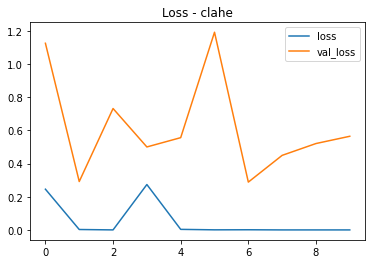

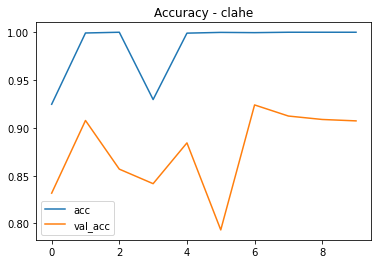

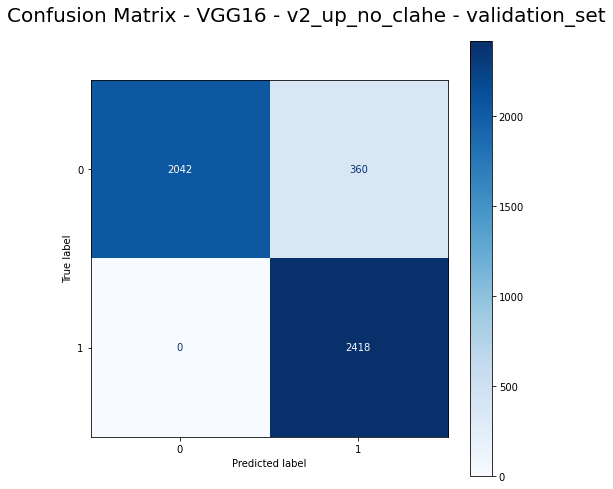

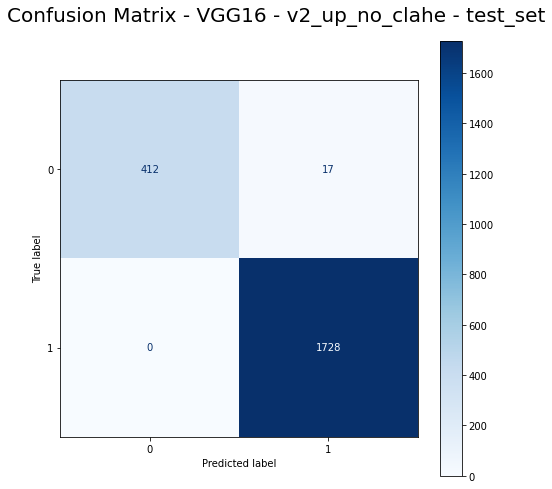

In [ ]:
# train valid test
# train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["CleanV1_clahe"]) # change
# print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

#handle folder
#train_test_dir()
# test_df = get_test_df(test_pos, test_neg)
train_val_dir = "/content/CleanV2_up_no_clahe/Train_Val" # change
test_dir = "/content/CleanV2_up_no_clahe/Test" # change
train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
                                                                              test_dir,
                                                                              validation_split = 0.2, 
                                                                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input) # change

# Model
model, callbacks = build_model(path_to_save=model_path) # change
history = fit_model(model, epochs=10, callbacks=callbacks)
save_history_plot(history, path_to_save=result_path)

# Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="validation_set", 
                     path_to_save= result_path) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test = get_threshold_result_test_ver2(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="VGG16", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="test_set", 
                     path_to_save= result_path) # change

# Resnet

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

def build_model(path_to_save):

  base_model = tf.keras.applications.resnet50.ResNet50(
                      include_top=False,
                      weights='imagenet',
                      input_shape=(224,224,3)
                  )
  
  for layer in base_model.layers[:-8]:
    layer.trainable = False

  x = keras.layers.Flatten()(base_model.output)
  x = keras.layers.Dense(256, activation='relu')(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.models.Model(base_model.input, x)

  model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001, decay=1e-7), 
              loss = 'binary_crossentropy',metrics = ['acc'])

  checkpoint = ModelCheckpoint(filepath=path_to_save,
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
  earlyStopping = tf.keras.callbacks.EarlyStopping(
                              monitor="val_loss",
                              patience=5,
                              verbose=1,
                              mode="min",
                            )
  callbacks = [checkpoint, earlyStopping]

  return model, callbacks

def fit_model(model, epochs, callbacks):
  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

  history = model.fit_generator(generator=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=epochs, callbacks=callbacks)
  return history

def save_history_plot(history, path_to_save):
  pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
  plt.title("Loss - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "loss.png"
  plt.savefig(path_pic)

  pd.DataFrame(history.history)[['acc', 'val_acc']].plot()
  plt.title("Accuracy - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "accuracy.png"
  plt.savefig(path_pic)

In [30]:
def get_loaded_model(path_saved_model):
  loaded_model = tf.keras.models.load_model(path_saved_model)
  return loaded_model

def predict_valid(loaded_model):
  STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size + 1
  valid_generator.reset()
  preds = loaded_model.predict_generator(valid_generator, steps=STEP_SIZE_TEST, verbose=1)

  return preds

def predict_test(loaded_model):
  STEP_SIZE_TEST=test_generator.n//test_generator.batch_size + 1
  test_generator.reset()
  preds = loaded_model.predict_generator(test_generator,
                                steps=STEP_SIZE_TEST,
                                verbose=1)
  return preds

def get_threshold_result_valid(preds, threshold):
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)
  
  pred_labels = [i[0] for i in preds_result]
  true_labels = valid_generator.labels

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(valid_generator.labels)) * 100
  print("Accuracy on validation set is: {}".format(persent))

  return pred_labels, true_labels

def get_threshold_result_test(preds, threshold): # threshold can be any value between 0 - 1, or if threshold = "mean", it will be mean of preds
  # preds_result = (preds > threshold) 
  # preds_result = preds_result.astype(int)

  pred_df = pd.DataFrame(test_generator.filenames, columns=['path'])
  pred_df['filename'] = pred_df['path'].apply(lambda x:x.split("/")[-1])
  pred_df['labels'] = preds

  df = test_df.merge(pred_df, on='filename')
  
  if threshold == "mean":
    pred_labels = df['labels_y'].values
    threshold = pred_labels.mean()
    pred_labels = (pred_labels > threshold)
    true_labels = df['labels_x'].values
  else:
    pred_labels = df['labels_y'].values
    pred_labels = (pred_labels > threshold)
    true_labels = df['labels_x'].values

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(test_generator.labels)) * 100
  print("the number of threshold is: {}".format(threshold))
  print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels, df

def get_confusion_matrix(pred_labels, true_labels, model_name, data_version_name, data_split_name, path_to_save, save=False):
  fig, axes = plt.subplots(1, 1, figsize=(8, 8))
  disp = ConfusionMatrixDisplay(confusion_matrix(true_labels,
                                      pred_labels),
                                      display_labels=[0, 1])
  disp.plot(ax=axes, values_format='.4g', cmap="Blues")
  fig.suptitle("Confusion Matrix - {} - {} - {}".format(model_name,data_version_name,data_split_name), size=20, y=0.94) # "Confusion Matrix - VGG16 - Augmented - Test set"
  filename = "Confusion-Matrix-{}-{}-{}.png".format(model_name,data_version_name,data_split_name)
  if save == True:
    plt.savefig("{}/{}".format(path_to_save, filename)) # Confusion-Matrix-VGG16-Augmented-test-pos-neg-50-50.png

In [16]:
!mkdir /content/resnet_result_unclean # name depends on dataset
result_path = "/content/resnet_result_unclean" # change
model_path = result_path + "/" + "ResNet50_unclean" # change

In [17]:
result_path, model_path

('/content/resnet_result_unclean',
 '/content/resnet_result_unclean/ResNet50_unclean')

In [ ]:
!mkdir /content/train_val
!mkdir /content/train_val/Positive
!mkdir /content/train_val/Negative
!mkdir /content/test #please create sub_folder in test cause Keras generator alway looks for subfolders (representing the classes).
!mkdir /content/test/test_folder

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 0.3257 - acc: 0.8785
Epoch 1: val_loss improved from inf to 0.91245, saving model to /content/resnet_result_unclean/ResNet50_unclean
INFO:tensorflow:Assets written to: /content/resnet_result_unclean/ResNet50_unclean/assets
48/48 [==============================] - 125s 3s/step - loss: 0.3257 - acc: 0.8785 - val_loss: 0.9124 - val_acc: 0.6842
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 0.0318 - acc: 0.9922
Epoch 2: val_loss improved from 0.91245 to 0.84654, saving model to /content/resnet_result_unclean/ResNet50_unclean
INFO:tensorflow:Assets written to: /content/resnet_result_unclean/ResNet50_unclean/assets
48/48 [==============================] - 119s 2s/step - loss: 0.0318 - acc: 0.9922 - val_loss: 0.8465 - val_acc: 0.7285
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 0.0148 - acc: 0.9974
Epoch 3: val_loss improved from 0.84654 to 0.77872, saving model to /content/resnet_r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


13/13 [==============================] - 39s 3s/step
Accuracy on validation set is: 77.15379706445438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


3369/3369 [==============================] - 67s 20ms/step
the number of threshold is: 0.5
Accuracy on test set is: 95.2790973871734


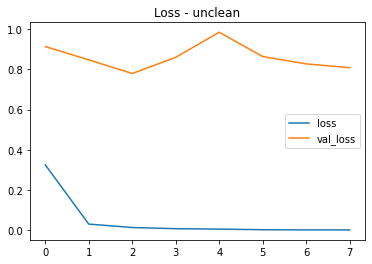

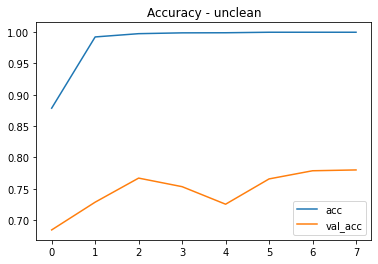

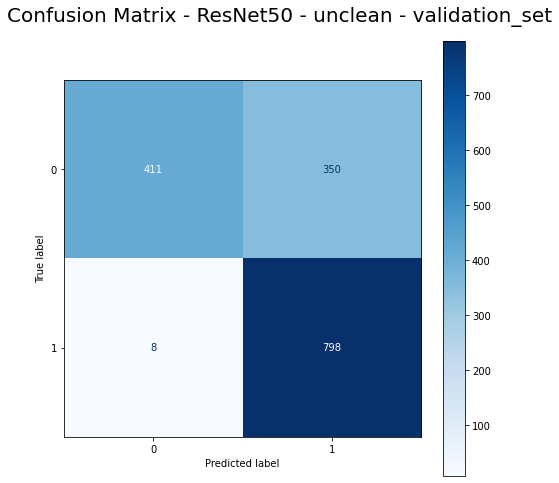

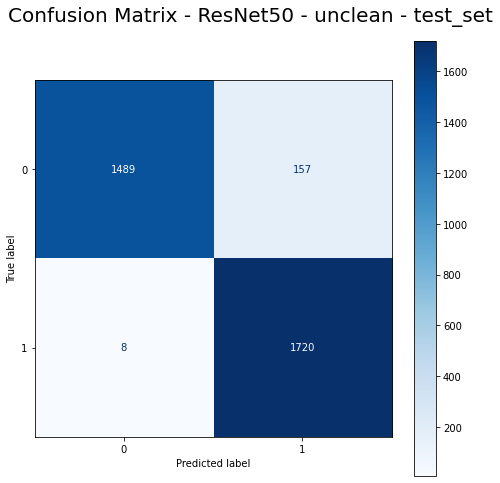

In [31]:
# # train valid test
# train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["unclean_dataset"]) # change
# print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

# #handle folder
# train_test_dir()
# test_df = get_test_df(test_pos, test_neg)
# train_val_dir = "/content/train_val" # change
# test_dir = "/content/test" # change
# train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
#                                                                               test_dir,
#                                                                               validation_split = 0.2, 
#                                                                               preprocessing_function = tf.keras.applications.resnet.preprocess_input) # change

# Model
model, callbacks = build_model(path_to_save=model_path) # change
history = fit_model(model, epochs=10, callbacks=callbacks)
save_history_plot(history, path_to_save=result_path)

# Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="ResNet50", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="validation_set", 
                     path_to_save= result_path,
                     save=True) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test, df = get_threshold_result_test(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="ResNet50", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="test_set", 
                     path_to_save= result_path,
                     save=True) # change

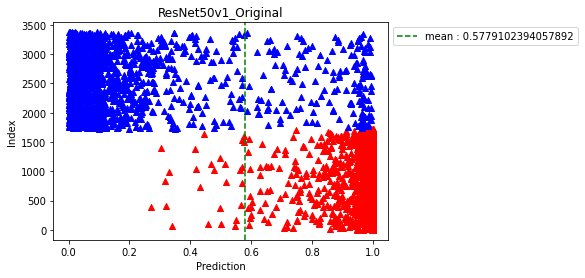

In [ ]:
import matplotlib.pyplot as plt

pred_test = df['labels_y']
true_label = df['labels_x']

for i in range (0,len(pred_test)):
  if true_label[i] == 1:
    plt.scatter(pred_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(pred_test[i],i, c='blue', marker = '^')

# plt.scatter(pred_test[0],0)
# plt.scatter(pred_test[1],1)

# # list(range(1,len(pred_test)+1)
plt.axvline(x=sum(pred_test)/len(pred_test), color='g',ls='--', label = 'mean : '+str(sum(pred_test)/len(pred_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('ResNet50v1_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

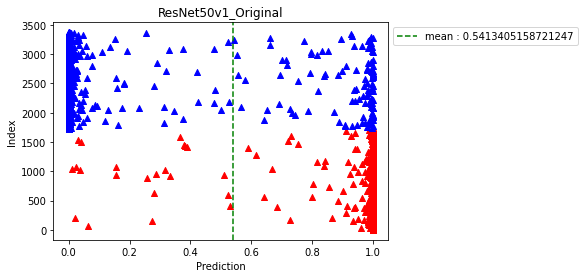

In [ ]:
import matplotlib.pyplot as plt

pred_test = df['labels_y']
true_label = df['labels_x']

for i in range (0,len(pred_test)):
  if true_label[i] == 1:
    plt.scatter(pred_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(pred_test[i],i, c='blue', marker = '^')

# plt.scatter(pred_test[0],0)
# plt.scatter(pred_test[1],1)

# # list(range(1,len(pred_test)+1)
plt.axvline(x=sum(pred_test)/len(pred_test), color='g',ls='--', label = 'mean : '+str(sum(pred_test)/len(pred_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('ResNet50v1_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

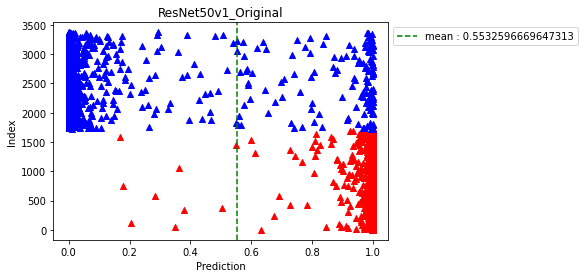

In [22]:
import matplotlib.pyplot as plt

pred_test = df['labels_y']
true_label = df['labels_x']

for i in range (0,len(pred_test)):
  if true_label[i] == 1:
    plt.scatter(pred_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(pred_test[i],i, c='blue', marker = '^')

# plt.scatter(pred_test[0],0)
# plt.scatter(pred_test[1],1)

# # list(range(1,len(pred_test)+1)
plt.axvline(x=sum(pred_test)/len(pred_test), color='g',ls='--', label = 'mean : '+str(sum(pred_test)/len(pred_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('ResNet50v1_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

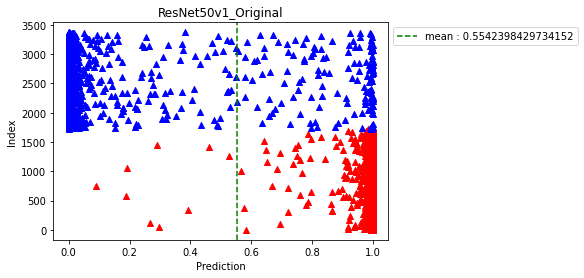

In [32]:
import matplotlib.pyplot as plt

pred_test = df['labels_y']
true_label = df['labels_x']

for i in range (0,len(pred_test)):
  if true_label[i] == 1:
    plt.scatter(pred_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(pred_test[i],i, c='blue', marker = '^')

# plt.scatter(pred_test[0],0)
# plt.scatter(pred_test[1],1)

# # list(range(1,len(pred_test)+1)
plt.axvline(x=sum(pred_test)/len(pred_test), color='g',ls='--', label = 'mean : '+str(sum(pred_test)/len(pred_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('ResNet50v1_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

# Resnet - V2-unc

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

def build_model(path_to_save):

  base_model = tf.keras.applications.resnet50.ResNet50(
                      include_top=False,
                      weights='imagenet',
                      input_shape=(224,224,3)
                  )
  
  for layer in base_model.layers[:-8]:
    layer.trainable = False

  x = keras.layers.Flatten()(base_model.output)
  x = keras.layers.Dense(256, activation='relu')(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.models.Model(base_model.input, x)

  model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-5), 
              loss = 'binary_crossentropy',metrics = ['acc'])

  checkpoint = ModelCheckpoint(filepath=path_to_save,
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
  earlyStopping = tf.keras.callbacks.EarlyStopping(
                              monitor="val_loss",
                              patience=5,
                              verbose=1,
                              mode="min",
                            )
  callbacks = [checkpoint, earlyStopping]

  return model, callbacks

def fit_model(model, epochs, callbacks):
  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

  history = model.fit_generator(generator=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=epochs, callbacks=callbacks)
  return history

def save_history_plot(history, path_to_save):
  pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
  plt.title("Loss - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "loss.png"
  plt.savefig(path_pic)

  pd.DataFrame(history.history)[['acc', 'val_acc']].plot()
  plt.title("Accuracy - {}".format(result_path.split("_")[-1]))
  path_pic = path_to_save + "/" + "accuracy.png"
  plt.savefig(path_pic)

In [ ]:
def get_loaded_model(path_saved_model):
  loaded_model = tf.keras.models.load_model(path_saved_model)
  return loaded_model

def predict_valid(loaded_model):
  STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size + 1
  valid_generator.reset()
  preds = loaded_model.predict_generator(valid_generator, steps=STEP_SIZE_TEST, verbose=1)

  return preds

def predict_test(loaded_model):
  STEP_SIZE_TEST=test_generator.n//test_generator.batch_size + 1
  test_generator.reset()
  preds = loaded_model.predict_generator(test_generator,
                                steps=STEP_SIZE_TEST,
                                verbose=1)
  return preds

def get_threshold_result_valid(preds, threshold):
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)
  
  pred_labels = [i[0] for i in preds_result]
  true_labels = valid_generator.labels

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(valid_generator.labels)) * 100
  print("Accuracy on validation set is: {}".format(persent))

  return pred_labels, true_labels

def get_threshold_result_test(preds, threshold): # threshold can be any value between 0 - 1, or if threshold = "mean", it will be mean of preds
  # preds_result = (preds > threshold) 
  # preds_result = preds_result.astype(int)

  pred_df = pd.DataFrame(test_generator.filenames, columns=['path'])
  pred_df['filename'] = pred_df['path'].apply(lambda x:x.split("/")[-1])
  pred_df['labels'] = preds

  df = test_df.merge(pred_df, on='filename')
  
  if threshold == "mean":
    pred_labels = df['labels_y'].values
    threshold = pred_labels.mean()
    pred_labels = (pred_labels > threshold)
    true_labels = df['labels_x'].values
  else:
    pred_labels = df['labels_y'].values
    pred_labels = (pred_labels > threshold)
    true_labels = df['labels_x'].values

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(test_generator.labels)) * 100
  print("the number of threshold is: {}".format(threshold))
  print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels, df

def get_threshold_result_test_ver2(preds, threshold): # for fai organized
  preds_result = (preds > threshold) 
  preds_result = preds_result.astype(int)
  
  pred_labels = [i[0] for i in preds_result]
  true_labels = test_generator.labels

  num_correct = sum(p == t for p, t in zip(pred_labels, true_labels))
  persent = (num_correct / len(test_generator.labels)) * 100
  print("Accuracy on test set is: {}".format(persent))

  return pred_labels, true_labels

def get_confusion_matrix(pred_labels, true_labels, model_name, data_version_name, data_split_name, path_to_save, save=False):
  fig, axes = plt.subplots(1, 1, figsize=(8, 8))
  disp = ConfusionMatrixDisplay(confusion_matrix(true_labels,
                                      pred_labels),
                                      display_labels=[0, 1])
  disp.plot(ax=axes, values_format='.4g', cmap="Blues")
  fig.suptitle("Confusion Matrix - {} - {} - {}".format(model_name,data_version_name,data_split_name), size=20, y=0.94) # "Confusion Matrix - VGG16 - Augmented - Test set"
  filename = "Confusion-Matrix-{}-{}-{}.png".format(model_name,data_version_name,data_split_name)
  if save == True:
    plt.savefig("{}/{}".format(path_to_save, filename)) # Confusion-Matrix-VGG16-Augmented-test-pos-neg-50-50.png

In [ ]:
!mkdir /content/resnet_result_v2_up-no-clahe # name depends on dataset
result_path = "/content/resnet_result_v2_up-no-clahe" # change
model_path = result_path + "/" + "ResNet50_v2_up-no-clahe" # change 

In [ ]:
result_path, model_path

('/content/resnet_result_v2_up-no-clahe',
 '/content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe')

In [ ]:
!mkdir /content/train_val
!mkdir /content/train_val/Positive
!mkdir /content/train_val/Negative
!mkdir /content/test #please create sub_folder in test cause Keras generator alway looks for subfolders (representing the classes).
!mkdir /content/test/test_folder

Found 19282 images belonging to 2 classes.
Found 4820 images belonging to 2 classes.
Found 2157 images belonging to 2 classes.
94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
150/150 [==============================] - ETA: 0s - loss: 0.1955 - acc: 0.9598
Epoch 1: val_loss improved from inf to 0.41717, saving model to /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe
INFO:tensorflow:Assets written to: /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/assets
150/150 [==============================] - 199s 1s/step - loss: 0.1955 - acc: 0.9598 - val_loss: 0.4172 - val_acc: 0.8894
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 0.9991
Epoch 2: val_loss improved from 0.41717 to 0.27593, saving model to /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe
INFO:tensorflow:Assets written to: /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/assets
150/150 [==============================] - 188s 1s/step - loss: 0.0043 - acc: 0.9991 - val_loss: 0.2759 - val_acc: 0.9098
Epoch 3/10
150/150 [==============================] - ETA: 0s - loss: 0.0011 - acc: 0.9998
Epoch 3: val_loss d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


38/38 [==============================] - 54s 1s/step
Accuracy on validation set is: 97.24066390041493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


17/17 [==============================] - 33s 2s/step
Accuracy on test set is: 99.21186833565136


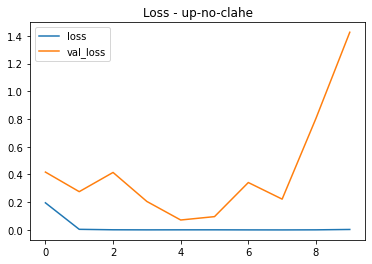

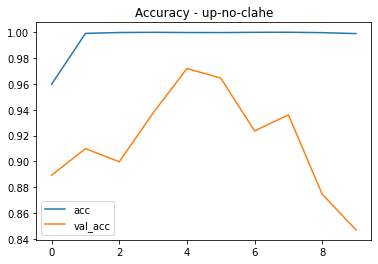

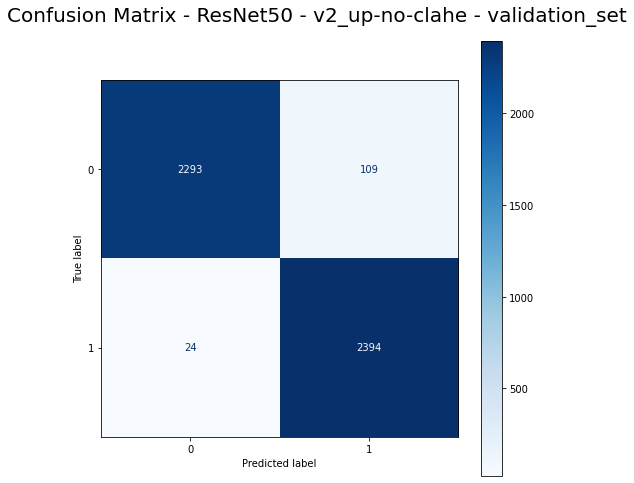

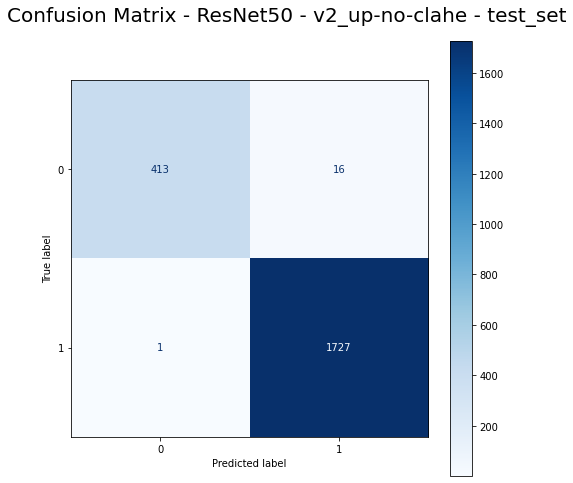

In [ ]:
#train valid test
# train_val_pos, test_pos, train_val_neg, test_neg = path_train_test_split(data["unclean_dataset"]) # change
# print(len(train_val_pos), len(test_pos), len(train_val_neg), len(test_neg))

# #handle folder
# train_test_dir()
# test_df = get_test_df(test_pos, test_neg)
train_val_dir = "/content/content/LeptoV3/Train_Val" # change
test_dir = "/content/content/LeptoV3/Test" # change
train_generator, valid_generator, test_generator = train_valid_test_generator(train_val_dir,
                                                                              test_dir,
                                                                              validation_split = 0.2, 
                                                                              preprocessing_function = tf.keras.applications.resnet.preprocess_input) # change

# Model
model, callbacks = build_model(path_to_save=model_path) # change
history = fit_model(model, epochs=10, callbacks=callbacks)
save_history_plot(history, path_to_save=result_path)

# Loaded model
loaded_model = get_loaded_model(path_saved_model= model_path) # change

# Predict
preds_valid = predict_valid(loaded_model)
pred_labels_valid, true_labels_valid = get_threshold_result_valid(preds_valid, threshold=0.5)
get_confusion_matrix(pred_labels_valid, true_labels_valid, 
                     model_name="ResNet50", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="validation_set", 
                     path_to_save= result_path,
                     save=True) # change

preds_test = predict_test(loaded_model)
pred_labels_test, true_labels_test = get_threshold_result_test_ver2(preds_test, threshold=0.5)
get_confusion_matrix(pred_labels_test, true_labels_test, 
                     model_name="ResNet50", # change
                     data_version_name= result_path.split("result_")[-1], # change
                     data_split_name="test_set", 
                     path_to_save= result_path,
                     save=True) # change

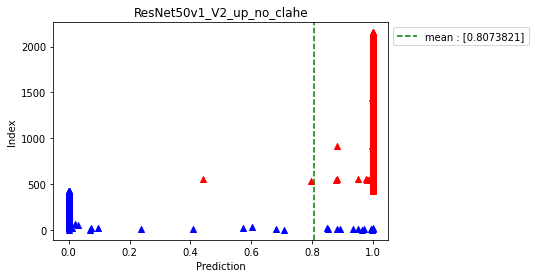

In [ ]:
import matplotlib.pyplot as plt

# pred_test = df['labels_y']
# true_label = df['labels_x']

for i in range (0,len(preds_test)):
  if true_labels_test[i] == 1:
    plt.scatter(preds_test[i],i, c='red', marker = '^')
  else:
    plt.scatter(preds_test[i],i, c='blue', marker = '^')

# plt.scatter(preds_test[0],0)
# plt.scatter(preds_test[1],1)

# # list(range(1,len(preds_test)+1)
plt.axvline(x=sum(preds_test)/len(preds_test), color='g',ls='--', label = 'mean : '+str(sum(preds_test)/len(preds_test)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('ResNet50v1_V2_up_no_clahe')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

# Save to server

In [ ]:
!zip -r /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe_model.zip /content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe

  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/ (stored 0%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/variables/ (stored 0%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/variables/variables.index (deflated 80%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/assets/ (stored 0%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/keras_metadata.pb (deflated 95%)
  adding: content/resnet_result_v2_up-no-clahe/ResNet50_v2_up-no-clahe/saved_model.pb (deflated 92%)


In [ ]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Resnet50V1/V2_UP_NO_CLAHE/"
path = "/content/resnet_result_v2_up-no-clahe/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

100%|██████████| 6/6 [01:12<00:00, 12.03s/it]


In [25]:
!zip -r /content/resnet_result_unclean/ResNet50_unclean_model.zip /content/resnet_result_unclean/ResNet50_unclean

  adding: content/resnet_result_unclean/ResNet50_unclean/ (stored 0%)
  adding: content/resnet_result_unclean/ResNet50_unclean/keras_metadata.pb (deflated 95%)
  adding: content/resnet_result_unclean/ResNet50_unclean/saved_model.pb (deflated 92%)
  adding: content/resnet_result_unclean/ResNet50_unclean/assets/ (stored 0%)
  adding: content/resnet_result_unclean/ResNet50_unclean/variables/ (stored 0%)
  adding: content/resnet_result_unclean/ResNet50_unclean/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: content/resnet_result_unclean/ResNet50_unclean/variables/variables.index (deflated 80%)


In [26]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Resnet50V1/unclean/"
path = "/content/resnet_result_unclean/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

100%|██████████| 6/6 [01:14<00:00, 12.45s/it]


In [ ]:
!zip -r /content/result_unclean/VGG16_unclean_model.zip /content/result_unclean/VGG16_unclean

  adding: content/result_unclean/VGG16_unclean/ (stored 0%)
  adding: content/result_unclean/VGG16_unclean/variables/ (stored 0%)
  adding: content/result_unclean/VGG16_unclean/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: content/result_unclean/VGG16_unclean/variables/variables.index (deflated 74%)
  adding: content/result_unclean/VGG16_unclean/assets/ (stored 0%)
  adding: content/result_unclean/VGG16_unclean/keras_metadata.pb (deflated 95%)
  adding: content/result_unclean/VGG16_unclean/saved_model.pb (deflated 90%)


In [ ]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Vgg16/Original/"
path = "/content/result_unclean/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

100%|██████████| 7/7 [00:19<00:00,  2.77s/it]


In [ ]:
!zip -r /content/result_v1_no_clahe/VGG16_v1_no_clahe_model.zip /content/result_v1_no_clahe/VGG16_v1_no_clahe -q
!zip -r /content/result_v1_clahe/VGG16_v1_clahe_model.zip /content/result_v1_clahe/VGG16_v1_clahe -q
!zip -r /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe_model.zip /content/result_v2_up_no_clahe/VGG16_v2_up_no_clahe -q

In [ ]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Vgg16/V1_NO_CLAHE/"
path = "/content/result_v1_no_clahe/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    print(i)
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

  0%|          | 0/6 [00:00<?, ?it/s]

VGG16_v1_no_clahe_model.zip


 33%|███▎      | 2/6 [00:15<00:31,  7.79s/it]

loss.png


 50%|█████     | 3/6 [00:16<00:14,  4.92s/it]

Confusion-Matrix-VGG16-v1_no_clahe-validation_set.png


 67%|██████▋   | 4/6 [00:17<00:06,  3.42s/it]

Confusion-Matrix-VGG16-v1_no_clahe-test_set.png


 83%|████████▎ | 5/6 [00:18<00:02,  2.54s/it]

accuracy.png


100%|██████████| 6/6 [00:19<00:00,  3.20s/it]


In [ ]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Vgg16/V1_CLAHE/"
path = "/content/result_v1_clahe/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

100%|██████████| 6/6 [00:18<00:00,  3.08s/it]


In [ ]:
dsc = "/var/www/html/Pice_folder/Leptospiral/Vgg16/V2_UP_NO_CLAHE/"
path = "/content/result_v2_up_no_clahe/"
files = os.listdir(path)
for i in tqdm(files):
  if '.' in i:
    if i[0] != '.':
      upload("{}/{}".format(path, i), destination_path = dsc)

100%|██████████| 6/6 [00:18<00:00,  3.00s/it]
